In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [3]:
df.columns = ['Month', 'Monthly Milk Production']

In [4]:
df.head()

,Month,Monthly Milk Production
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [5]:
df.tail()

,Month,Monthly Milk Production
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [6]:
df.drop(168, axis=0, inplace=True)

In [7]:
df['Month'] = pd.to_datetime(df['Month'])

In [8]:
df.head()

,Month,Monthly Milk Production
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [9]:
df.set_index('Month', inplace=True)

In [10]:
df.head()

,Monthly Milk Production
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [11]:
df.describe()

,Monthly Milk Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


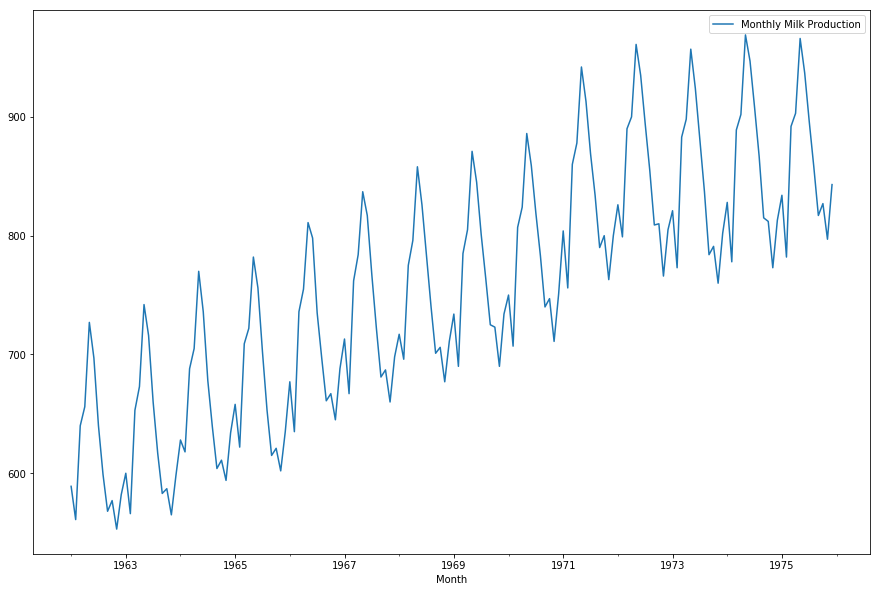

In [12]:
df.plot(figsize=(15,10))

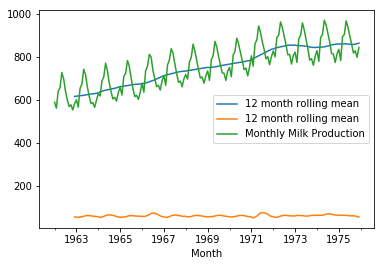

In [13]:
df['Monthly Milk Production'].rolling(12).mean().plot(label='12 month rolling mean')
df['Monthly Milk Production'].rolling(12).std().plot(label='12 month rolling mean')
df['Monthly Milk Production'].plot();
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


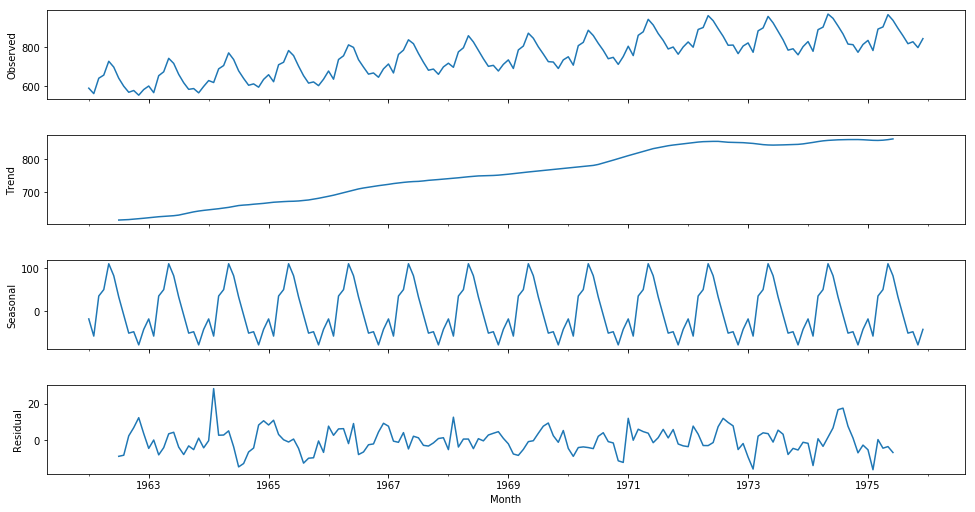

In [14]:
# Error trend seasonality componenet (ETS)
from statsmodels.tsa.seasonal import seasonal_decompose
fig = seasonal_decompose(df['Monthly Milk Production']).plot()
fig.set_size_inches(15,8)

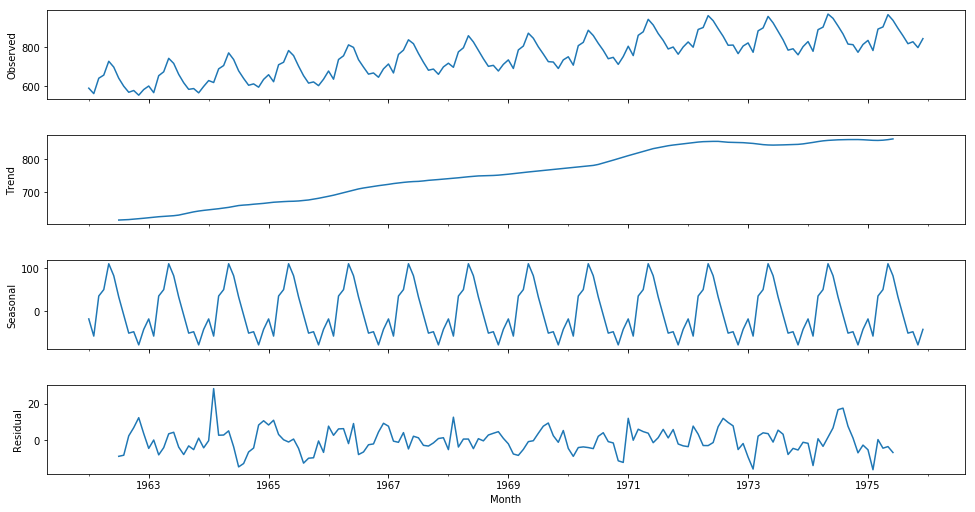

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
fig = seasonal_decompose(df['Monthly Milk Production'], freq=12).plot()
fig.set_size_inches(15,8)

In [16]:
df.head()

,Monthly Milk Production
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [17]:
# using augmented dickey fuller test, Null hypothesis is that its non-stationary
from statsmodels.tsa.stattools import adfuller

In [18]:
result = adfuller(df['Monthly Milk Production'])

In [19]:
result

(-1.303811587422125,
 0.62742670860303362,
 13,
 154,
 {'1%': -3.4735425281962091,
  '10%': -2.5768780536346769,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [20]:
def ad_check(time_series):
    result = adfuller(time_series)
    print("Augmented Dicky-Fuller Test")
    labels = ['ADF Test Stat', 'p-value', '# of lags', 'num of observations used']
    
    for value, label in zip(result,labels):
        print(label + ' : ' +str(value))
    
    if result[1] <= 0.05:
        print('strong evidence against null hypothesis')
        print('reject null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('weak eveidence against null hypothesis')
        print('fail to reject null hypothesis')
        print('Data has a unit root, it is non-stationary')

In [21]:
ad_check(df['Monthly Milk Production'])

Augmented Dicky-Fuller Test
ADF Test Stat : -1.30381158742
p-value : 0.627426708603
# of lags : 13
num of observations used : 154
weak eveidence against null hypothesis
fail to reject null hypothesis
Data has a unit root, it is non-stationary


In [22]:
# data is non-stationary so need to take the difference
df['First Difference'] = df['Monthly Milk Production'].diff()

In [23]:
df.head()

,Monthly Milk Production,First Difference
Month,,
1962-01-01,589.0,NaN
1962-02-01,561.0,-28.0
1962-03-01,640.0,79.0
1962-04-01,656.0,16.0
1962-05-01,727.0,71.0


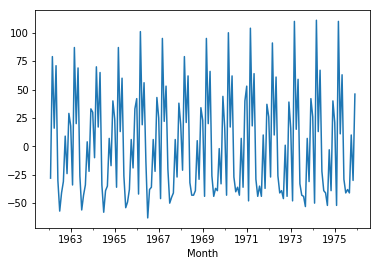

In [24]:
df['First Difference'].plot() # looks stationary so should be good

In [25]:
ad_check(df['First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Stat : -3.05499555865
p-value : 0.0300680040018
# of lags : 14
num of observations used : 152
strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [26]:
df['second difference'] = df['First Difference'].diff()

In [27]:
ad_check(df['second difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Stat : -14.3278736456
p-value : 1.11269893321e-26
# of lags : 11
num of observations used : 154
strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [28]:
df['Seasonal Difference'] = df['Monthly Milk Production'].diff(12)

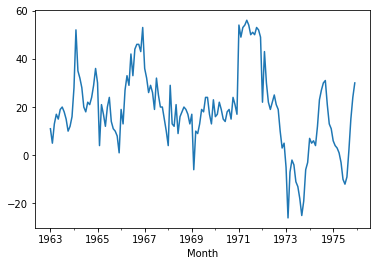

In [29]:
df['Seasonal Difference'].plot();

In [30]:
ad_check(df['Seasonal Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Stat : -2.33541931436
p-value : 0.160798805277
# of lags : 12
num of observations used : 143
weak eveidence against null hypothesis
fail to reject null hypothesis
Data has a unit root, it is non-stationary


In [31]:
df.head()

,Monthly Milk Production,First Difference,second difference,Seasonal Difference
Month,,,,
1962-01-01,589.0,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN
1962-04-01,656.0,16.0,-63.0,NaN
1962-05-01,727.0,71.0,55.0,NaN


In [32]:
df['Seasonal First Difference'] = df['First Difference'].diff(12)

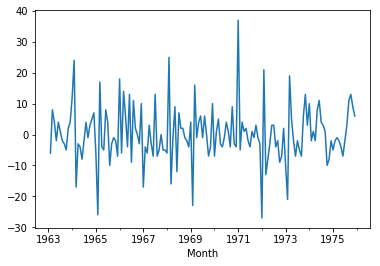

In [33]:
df['Seasonal First Difference'].plot()

In [34]:
ad_check(df['Seasonal First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Stat : -5.03800227492
p-value : 1.86542343188e-05
# of lags : 11
num of observations used : 143
strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [35]:
# importing autocorrelation and partial auto correlation plot modules
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

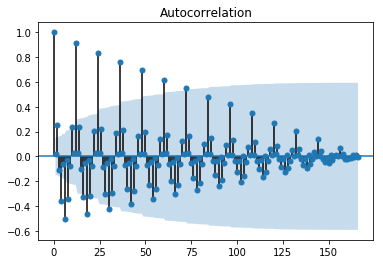

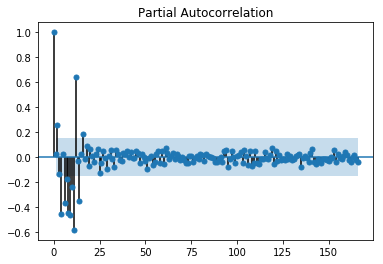

In [36]:
plot_acf(df['First Difference'].dropna());
plot_pacf(df['First Difference'].dropna());

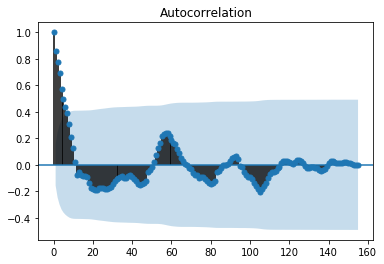

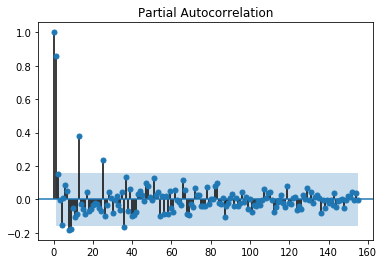

In [37]:
plot_acf(df['Seasonal Difference'].dropna());
plot_pacf(df['Seasonal Difference'].dropna());

In [38]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [39]:
model = SARIMAX(df['Monthly Milk Production'], order=(0,1,0), seasonal_order=(1,1,1,12))

In [40]:
results = model.fit()

In [41]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:            Monthly Milk Production   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Sun, 17 Dec 2017   AIC                           1074.131
Time:                                    04:28:14   BIC                           1083.503
Sample:                                01-01-1962   HQIC                          1077.934
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

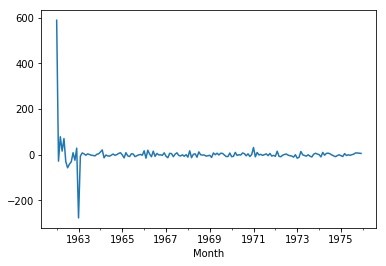

In [42]:
results.resid.plot()

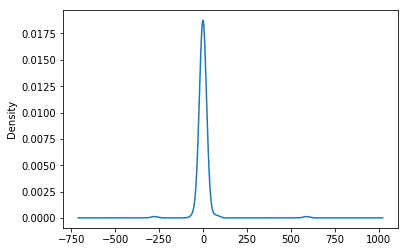

In [43]:
results.resid.plot(kind='kde')

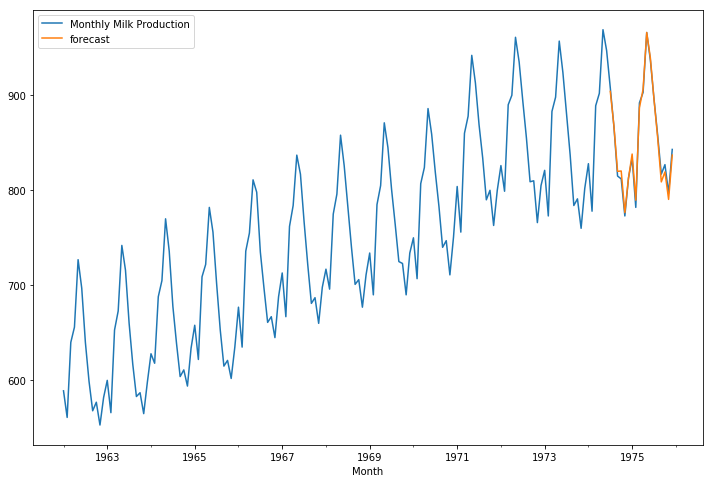

In [44]:
df['forecast'] = results.predict(start=150, end=168)
df[['Monthly Milk Production', 'forecast']].plot(figsize=(12,8))

In [45]:
df.tail()

,Monthly Milk Production,First Difference,second difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,,
1975-08-01,858.0,-38.0,3.0,-9.0,3.0,855.358617
1975-09-01,817.0,-41.0,-3.0,2.0,11.0,808.841268
1975-10-01,827.0,10.0,51.0,15.0,13.0,819.323183
1975-11-01,797.0,-30.0,-40.0,24.0,9.0,790.427500
1975-12-01,843.0,46.0,76.0,30.0,6.0,837.063646


In [46]:
from pandas.tseries.offsets import DateOffset

In [47]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1,24)]

In [48]:
future_dates

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [49]:
future_df = pd.DataFrame(index=future_dates, columns=df.columns)

In [58]:
print(df.shape)
print(168+23)

(168, 6)
191


In [55]:
future_df.shape

(23, 6)

In [50]:
final_df = pd.concat([df, future_df])

In [53]:
final_df.shape

(191, 6)

In [59]:
final_df['forecast'] = results.predict(start=168, end=192)

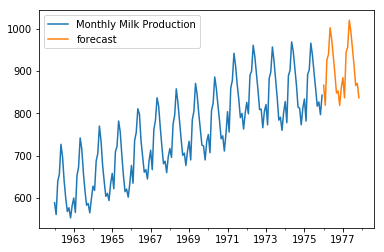

In [62]:
final_df[['Monthly Milk Production', 'forecast']].plot()